In [1]:
import numpy as np
import os
import PIL
import PIL.Image
import tensorflow as tf
import tensorflow_datasets as tfds

In [2]:
import glob
import imageio
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
from tensorflow.keras import layers
import time
from IPython import display

In [3]:
import glob
import pathlib

In [7]:
ls

sample_data/


In [8]:
pwd

'/content'

In [9]:
image_count = len(list(glob.glob('/content/sample_data/cartoons/*.png')))
image_count

541

In [10]:
#Make dataset

In [11]:
batch_size = 32
img_height = 180
img_width = 180

In [12]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
import os

In [13]:
img_dir="sample_data/cartoons/"

In [14]:
dataset = keras.preprocessing.image_dataset_from_directory(
    img_dir, label_mode=None, image_size=(img_height, img_width),\
    batch_size=batch_size
)

Found 541 files belonging to 1 classes.


In [15]:
dataset = dataset.map(lambda x: x / 255.0)

In [16]:
dataset.take(1)

<_TakeDataset element_spec=TensorSpec(shape=(None, 180, 180, 3), dtype=tf.float32, name=None)>

In [17]:
#generator

In [18]:
180/4

45.0

In [19]:
#input is noise
def make_generator_model():
    model = tf.keras.Sequential()
    model.add(layers.Dense(45*45*256, use_bias=False, input_shape=(100,)))
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Reshape((45, 45, 256)))
    assert model.output_shape == (None, 45, 45, 256)  # Note: None is the batch size

    model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), padding='same', use_bias=False))
    assert model.output_shape == (None, 45, 45, 128)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), padding='same', use_bias=False))
    assert model.output_shape == (None, 90, 90, 64)
    model.add(layers.BatchNormalization())
    model.add(layers.LeakyReLU())

    model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), padding='same', use_bias=False, activation='tanh'))
    assert model.output_shape == (None, 180, 180, 3)

    return model

#output is fake image

In [20]:
model = tf.keras.Sequential()
model.add(layers.Dense(45*45*256, use_bias=False, input_shape=(100,)))
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU())

model.add(layers.Reshape((45, 45, 256)))
assert model.output_shape == (None, 45, 45, 256)  # Note: None is the batch size

model.add(layers.Conv2DTranspose(128, (5, 5), strides=(1, 1), \
                                 padding='same', use_bias=False))
assert model.output_shape == (None, 45, 45, 128)
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU())

model.add(layers.Conv2DTranspose(64, (5, 5), strides=(2, 2), \
                                 padding='same', use_bias=False))
assert model.output_shape == (None, 90, 90, 64)
model.add(layers.BatchNormalization())
model.add(layers.LeakyReLU())

model.add(layers.Conv2DTranspose(3, (5, 5), strides=(2, 2), \
                                 padding='same', use_bias=False, activation='tanh'))
assert model.output_shape == (None, 180, 180, 3)

In [21]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 518400)            51840000  
                                                                 
 batch_normalization (BatchN  (None, 518400)           2073600   
 ormalization)                                                   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 518400)            0         
                                                                 
 reshape (Reshape)           (None, 45, 45, 256)       0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 45, 45, 128)      819200    
 nspose)                                                         
                                                                 
 batch_normalization_1 (Batc  (None, 45, 45, 128)      5

In [22]:
noise = tf.random.normal([1, 100])

In [23]:
model(noise, training=False)

<tf.Tensor: shape=(1, 180, 180, 3), dtype=float32, numpy=
array([[[[-1.3519816e-04, -4.9717043e-04,  5.1448369e-06],
         [-4.9213710e-04,  9.5823378e-04,  3.4457666e-04],
         [-5.1888864e-04, -1.7475741e-04, -8.1658125e-04],
         ...,
         [-1.4230045e-03, -1.7908627e-04,  1.1687718e-03],
         [-1.4673613e-03, -7.8726094e-04, -1.5038389e-03],
         [ 1.4426620e-04,  2.7645894e-04, -3.4779659e-04]],

        [[-3.9618765e-04, -3.4262330e-04, -5.9546978e-04],
         [-5.9854542e-04,  9.7121345e-04, -3.4968567e-04],
         [-2.7666014e-04, -6.8234146e-04,  6.4860401e-04],
         ...,
         [-1.6340133e-03, -3.2997548e-03,  1.1740112e-03],
         [ 2.1507649e-04, -2.0580089e-03, -8.3745457e-05],
         [ 4.2218465e-04, -1.8288475e-04, -1.3677310e-03]],

        [[ 8.2621770e-04,  4.6509507e-05, -1.4520397e-04],
         [-1.2782920e-03, -4.7361004e-04, -3.3971386e-03],
         [ 2.3763105e-03, -1.0591608e-03, -2.9260435e-04],
         ...,
         [-

In [24]:
noise = tf.random.normal([1, 100])

In [25]:
noise[0].shape

TensorShape([100])

In [26]:
generator = make_generator_model()

In [27]:
generated_image = generator(noise, training=False)

In [28]:
generated_image.shape

TensorShape([1, 180, 180, 3])

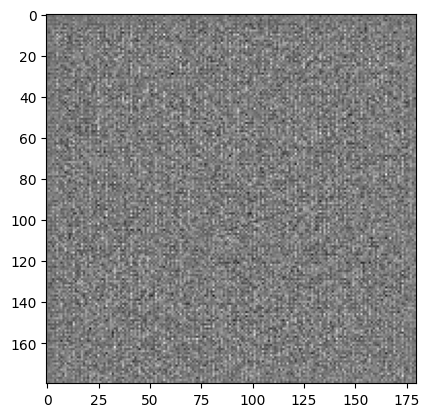

In [29]:
plt.imshow(generated_image[0, :, :, 0], cmap='gray')

In [30]:
#input is fake image
def make_discriminator_model():
    model = tf.keras.Sequential()
    model.add(layers.Conv2D(64, (5, 5), strides=(2, 2), padding='same',
                                     input_shape=[180, 180, 3]))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(128, (5, 5), strides=(2, 2), padding='same'))
    model.add(layers.LeakyReLU())
    model.add(layers.Dropout(0.3))

    model.add(layers.Flatten())
    model.add(layers.Dense(1))

    return model

In [31]:
noise = tf.random.normal([1, 100])
generated_image = generator(noise, training=False)

In [32]:
generated_image.shape

TensorShape([1, 180, 180, 3])

In [33]:
discriminator = make_discriminator_model()

In [34]:
discriminator(generated_image)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00076156]], dtype=float32)>

In [35]:
decision = discriminator(generated_image)
decision

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[-0.00076156]], dtype=float32)>

In [36]:
cross_entropy = tf.keras.losses.BinaryCrossentropy(from_logits=True)

In [37]:
def discriminator_loss(real_output, fake_output):
    real_loss = cross_entropy(tf.ones_like(real_output), real_output)
    fake_loss = cross_entropy(tf.zeros_like(fake_output), fake_output)
    total_loss = real_loss + fake_loss
    return total_loss

In [38]:
def generator_loss(fake_output):
    return cross_entropy(tf.ones_like(fake_output), fake_output)

In [39]:
generator_optimizer = tf.keras.optimizers.Adam(1e-4)
discriminator_optimizer = tf.keras.optimizers.Adam(1e-4)

In [40]:
checkpoint_dir = './training_checkpoints'
checkpoint_prefix = os.path.join(checkpoint_dir, "ckpt")
checkpoint = tf.train.Checkpoint(generator_optimizer=generator_optimizer,
                                 discriminator_optimizer=discriminator_optimizer,
                                 generator=generator,
                                 discriminator=discriminator)

In [41]:
BUFFER_SIZE = 2000
BATCH_SIZE = 32

In [57]:
EPOCHS = 297
noise_dim = 100
num_examples_to_generate = 16

In [43]:
seed = tf.random.normal([num_examples_to_generate, noise_dim])

In [44]:
@tf.function
def train_step(images):
    #gets random noise in batch size
    noise = tf.random.normal([BATCH_SIZE, noise_dim])
    
    with tf.GradientTape() as gen_tape, tf.GradientTape() as disc_tape:
        #GENERATOR
        generated_images = generator(noise, training=True)
        
        #discrimainator train on real images
        real_output = discriminator(images, training= True)
        
        #discrimainator train on fake images
        fake_output = discriminator(generated_images, training= True)
        
        #Get LOSSES
        gen_loss = generator_loss(fake_output)
        disc_loss = discriminator_loss(real_output, fake_output)
        
        #get gradients
        gradients_of_generator = gen_tape.gradient(gen_loss, generator.trainable_variables)
        gradients_of_discriminator = disc_tape.gradient(disc_loss, discriminator.trainable_variables)
        
        #optimizers
        generator_optimizer.apply_gradients(zip(gradients_of_generator, generator.trainable_variables))
        discriminator_optimizer.apply_gradients(zip(gradients_of_discriminator, discriminator.trainable_variables))

        return gen_loss, disc_loss
    

In [45]:
def train(dataset, epochs):
  for epoch in range(epochs):
    start = time.time()
    g_loss =[]
    d_loss=[]

    for image_batch in dataset:
      gen_loss, disc_loss = train_step(image_batch)
    g_loss.append(gen_loss)
    d_loss.append(disc_loss)

    # Produce images for the GIF as you go
    display.clear_output(wait=True)
    generate_and_save_images(generator,
                             epoch + 1,
                             seed)

    # Save the model every 15 epochs
    if (epoch + 1) % 15 == 0:
      checkpoint.save(file_prefix = checkpoint_prefix)

    print ('Time for epoch {} is {} sec'.format(epoch + 1, time.time()-start))

  # Generate after the final epoch
  display.clear_output(wait=True)
  generate_and_save_images(generator,
                           epochs,seed)
  
  return g_loss,d_loss

In [55]:
def generate_and_save_images(model, epoch, test_input):
  # Notice `training` is set to False.
  # This is so all layers run in inference mode (batchnorm).
  predictions = model(test_input, training=False)

  fig = plt.figure(figsize=(6, 6))

  for i in range(predictions.shape[0]):
      plt.subplot(4, 4, i+1)
      plt.imshow(predictions[i, :, :, 0] * 127.5 + 127.5, )
      plt.axis('off')

  plt.savefig('image_at_epoch_{:04d}.png'.format(epoch))
  plt.show()

In [66]:
 d_loss

[<tf.Tensor: shape=(), dtype=float32, numpy=1.0216603>]

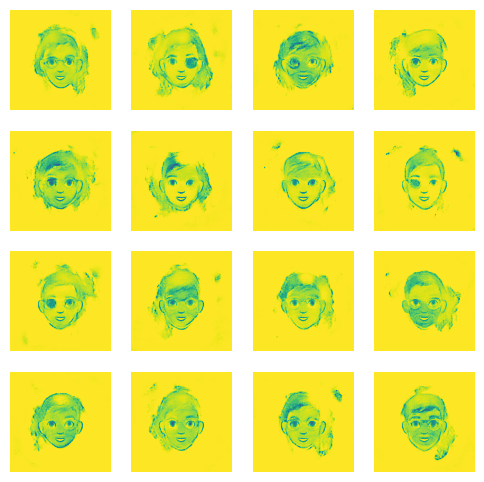

In [58]:
g_loss,d_loss= train(dataset, EPOCHS)

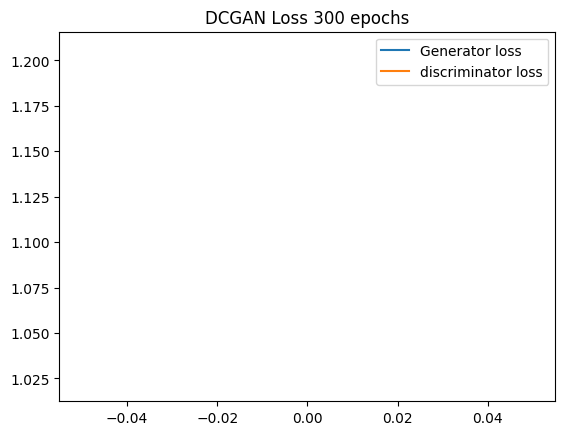

In [60]:

plt.plot(g_loss,label="Generator loss")
plt.plot(d_loss, label="discriminator loss")
plt.title("DCGAN Loss 300 epochs")
plt.legend()
plt.show()

In [61]:
# Display a single image using the epoch number
def display_image(epoch_no):
    return PIL.Image.open('image_at_epoch_{:04d}.png'.format(epoch_no))

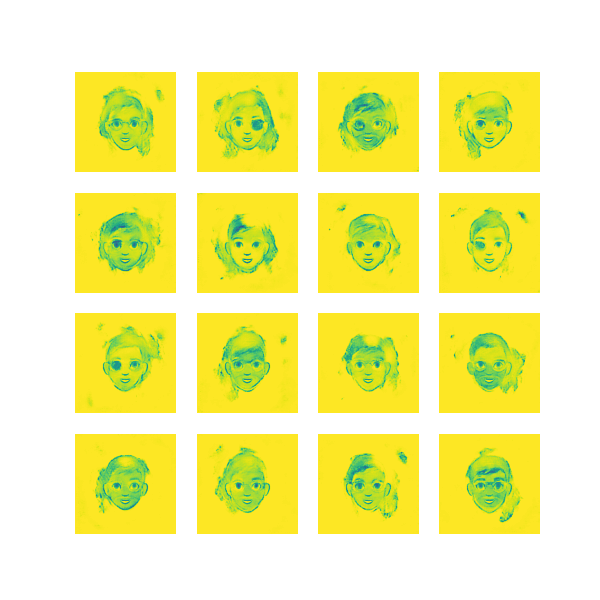

In [62]:
display_image(EPOCHS)

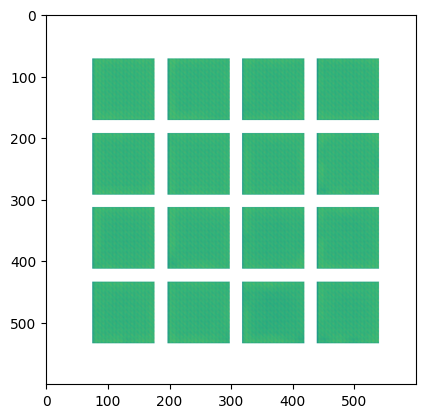

In [70]:
plt.imshow(plt.imread("image_at_epoch_0001.png"))

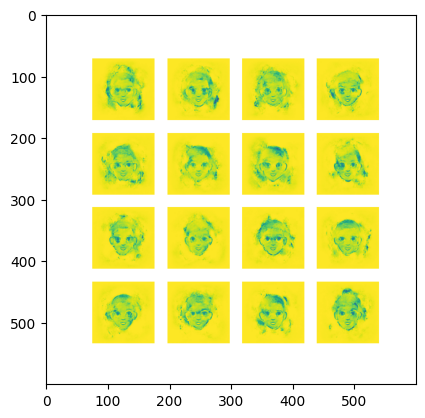

In [71]:
plt.imshow(plt.imread("image_at_epoch_0100.png"))

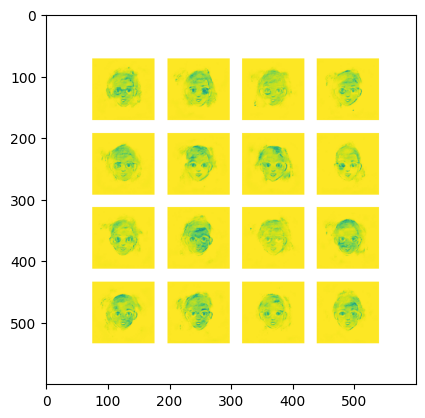

In [72]:
plt.imshow(plt.imread("image_at_epoch_0150.png"))

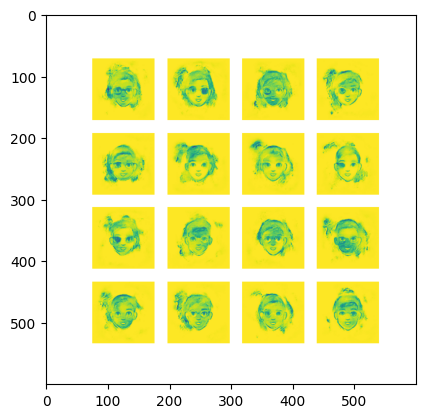

In [73]:
plt.imshow(plt.imread("image_at_epoch_0200.png"))

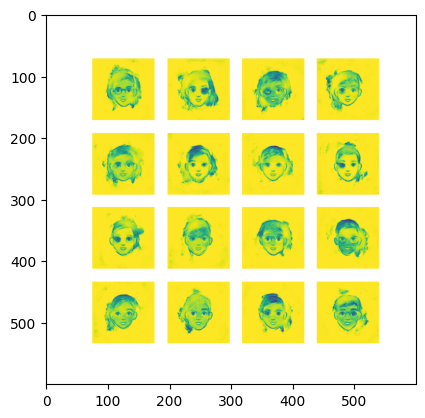

In [74]:
plt.imshow(plt.imread("image_at_epoch_0290.png"))

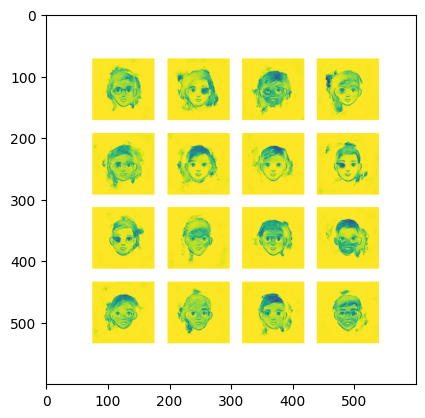

In [77]:
plt.imshow(plt.imread("image_at_epoch_0291.png"))

In [63]:
anim_file = 'cartoon.gif'

with imageio.get_writer(anim_file, mode='I') as writer:
    filenames = glob.glob('image*.png')
    filenames = sorted(filenames)
    for filename in filenames:
        image = imageio.imread(filename)
        writer.append_data(image)
    image = imageio.imread(filename)
    writer.append_data(image)

<ipython-input-63-b6f32ef9f693>:7: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)
<ipython-input-63-b6f32ef9f693>:9: DeprecationWarning: Starting with ImageIO v3 the behavior of this function will switch to that of iio.v3.imread. To keep the current behavior (and make this warning disappear) use `import imageio.v2 as imageio` or call `imageio.v2.imread` directly.
  image = imageio.imread(filename)


In [78]:
#import tensorflow_docs.vis.embed as embed
#embed.embed_file(anim_file)